# **AP155 Lab Assignment** 
## Module 3: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 5 are worth 15, 15, 15, 25, and 30 points, respectively).

_Due Date_: **5PM of November 15 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Salinas, Jose Enrico\
_Student No._: 201808184\
_Section_: THX2

In [1]:
# !pip install pytz
from datetime import datetime
from pytz import timezone
print("Last run: ", datetime.now(timezone("Asia/Manila")).strftime("%m/%d/%Y, %H:%M:%S"))

Last run:  11/17/2022, 14:44:29


### Submission Information

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** SALINAS, Jose Enrico

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/15
* Problem 2 - XX/15
* Problem 3 - XX/15
* Problem 4 - XX/25
* Problem 5 - XX/30

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

In [2]:
import numpy as np
from numpy import linalg as la

import matplotlib.pyplot as plt
import seaborn as sns

### PROBLEM 1 (15 pts.; 50/50 for code & discussion) 
**Calculate the inverse of a matrix and LU decomposition**

1. Use numpy's $\tt linalg$ package to calculate the inverse of the ff. matrix *(5 pts.)*: 

$ \begin{equation} 
{\bf A} = 
\begin{pmatrix} 
4 & -2 & 1 \\
3 & 6 & -4 \\
2 & 1 & 8 
\end{pmatrix} \end{equation} $

2. Check your inverse in both directions; that is, check that ${\bf AA}^{−1} = {\bf A}^{−1}{\bf A} = {\bf I}$. Up to how many number of decimal places is this true? *(5 pts.)*

3. Let this matrix $\bf A$ be used to describe three simultaneous linear equations, ${\bf Ax = b}$. Solve for the vector $\bf x$ given
${\bf b} = \begin{pmatrix} 
12 \\ 
-25 \\ 
32 
\end{pmatrix}$ using: (i) the numerical inverse calculated in (1) and (ii) LU decomposition and backsubstitution with numpy's $\tt linalg$ package. *(5 pts. each)*


We begin by defining the matrix representation for our system of linear equations.

In [3]:
a = np.array([[4, -2, 1], 
             [3, 6, -4], 
             [2, 1, 8]])

Using `numpy.linalg.inv`, we numerically calculate the inverse of the matrix.

In [4]:
inv_a = la.inv(a)
print(inv_a)

[[ 0.19771863  0.06463878  0.00760456]
 [-0.121673    0.11406844  0.07224335]
 [-0.03422053 -0.03041825  0.11406844]]


To verify that this is indeed the inverse, we multiply it to the original matrix on the left and the right side and compare the result. Each multiplcation should result in an identity matrix.

In [5]:
left_inv = np.matmul(inv_a, a)
right_inv = np.matmul(a, inv_a)

print(left_inv - right_inv)

[[ 0.00000000e+00 -1.04083409e-17  5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00  1.66533454e-16]
 [ 2.77555756e-17  5.55111512e-17  0.00000000e+00]]


The diffrence is zero along the diagonals and some error of order $10^{-17}$ elsewhere which is likely dominated by precision error. Since it is negligible, the estimate of the inverse is acceptable.

We can solve the system by defining the RHS and using either LU decomposition built-in to the `numpy.linalg` package or multiplying the inverse to both sides of the equation. The two methods return similar results.

In [6]:
b = np.array([[12], [-25], [32]])
x_inv = np.matmul(inv_a, b)
x_lu = la.solve(a, b)

print("Inverse method: ", x_inv.T)
print("LU method: ", x_lu.T)

Inverse method:  [[ 1. -2.  4.]]
LU method:  [[ 1. -2.  4.]]


### PROBLEM 2 (15 pts.; 50/50 for code & discussion)

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(10 pts.)*: 

$ \begin{equation} 
{\bf A} = 
\begin{pmatrix} 
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3 
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(5 pts.)*

Similarly, the `numpy.linalg` package contain the `eig` method to solve for the eigenvectors and eigenvalues of a matrix. We first define the matrix representation of the linear system. We then call `numpy.linalg.eig` with the matrix as the argument which returns the eigenvectors and a list of eigenvalues.

In [7]:
a = np.array([[8, -2, -20],
              [-2, -3, -9],
              [-20, -9, -3]])

e, v = la.eig(a)


Note that the returned list of eigenvalues is one dimensional. We need to diagonalize this using `np.diag` to the form

$$D=\begin{bmatrix}e_1&0&\cdots\\
0&e_2&\cdots\\
\vdots&\vdots&\ddots
\end{bmatrix}$$

We substitute these into the equation $AV=VD$ to verify that these are the eigenvectors and eigenvalues, respectively.

In [8]:
d = np.diag(e)
lhs = np.matmul(a, v)
rhs = np.matmul(v, d)

np.round(lhs - rhs, 12)

array([[-0.,  0.,  0.],
       [-0.,  0.,  0.],
       [-0., -0., -0.]])

### PROBLEM 3 (15 pts.; 50/50 for code & discussion)

**Physics Application: Rigid body rotations with matrices**

Consider the cube in this figure:

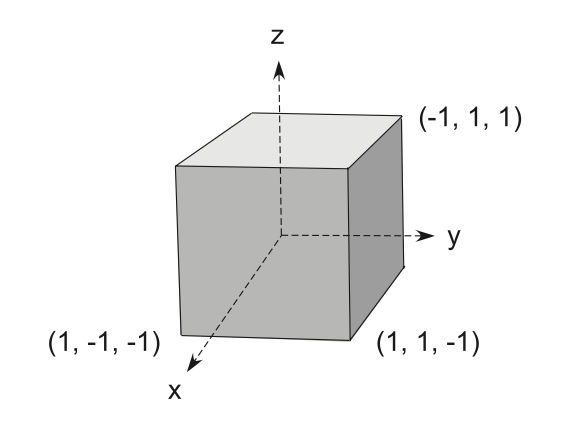

The cube has an inertia tensor for axes at the center:

$ \begin{equation} 
{\bf I} = 
\begin{pmatrix} 
2/3 & -1/4 & -1/4 \\
-1/4 & 2/3 & -1/4 \\
-1/4 & -1/4 & 2/3 
\end{pmatrix}. \end{equation} $

The cube is rotated with the three angular velocities:

$ \begin{equation} 
{\bf \omega} = 
\begin{pmatrix}
1 \\ 0 \\ 0
\end{pmatrix}, \ {\bf \omega} = 
\begin{pmatrix}
0 \\ 1 \\ 0
\end{pmatrix} \ {\bf \omega} = 
\begin{pmatrix}
1 \\ 1 \\ 1
\end{pmatrix}
\end{equation} $

1. Compute the angular momentum vector $\bf L$ via the matrix multiplication ${\bf L} = {\bf I\omega}$ for each case. (5 pts.)

2. Make three 3-D plots for ${\bf \omega}$ and ${\bf L}$ for each case. Label and describe your plots clearly. (10 pts.)

First, we define the inertia tensor and a vector for each angular velocity $\omega_i$.

In [9]:
i = np.array([[2/3, -1/4, -1/4], 
              [-1/4, 2/3, -1/4], 
              [-1/4, -1/4, 2/3]])

w1 = np.array([[1], [0], [0]])
w2 = np.array([[0], [1], [0]])
w3 = np.array([[1], [1], [1]])

The angular momentum is given by $L=I\omega$. We can define each $L_i$ by multiplying $I$ and $\omega_i$ using `np.matmul`.

In [10]:
l1 = np.matmul(i, w1)
l2 = np.matmul(i, w2)
l3 = np.matmul(i, w3)

Lastly, can plot each $L_i$ and $\omega_i$.

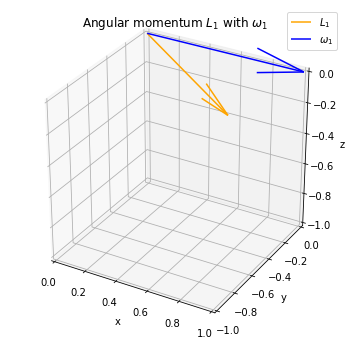

In [11]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.axes(projection='3d')
ax1.quiver(0, 0, 0, *l1, color='orange', label='$L_1$')
ax1.quiver(0, 0, 0, *w1, color='blue', label='$\omega_1$')
ax1.set_xlim([0, 1])
ax1.set_ylim([-1, 0])
ax1.set_zlim([-1, 0])

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Angular momentum $L_{}$ with $\omega_{}$'.format(1, 1))
ax1.legend()

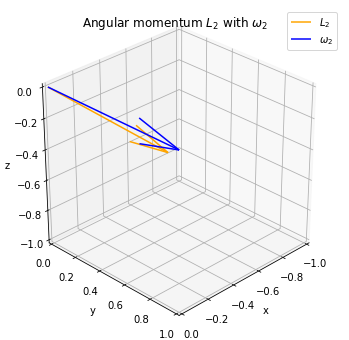

In [12]:
fig = plt.figure(figsize=(6, 6))
ax2 = plt.axes(projection='3d')
ax2.quiver(0, 0, 0, *l2, color='orange', label='$L_2$')
ax2.quiver(0, 0, 0, *w2, color='blue', label='$\omega_2$')
ax2.set_xlim([-1, 0])
ax2.set_ylim([0, 1])
ax2.set_zlim([-1, 0])
ax2.azim = 45

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Angular momentum $L_{}$ with $\omega_{}$'.format(2, 2))
ax2.legend()

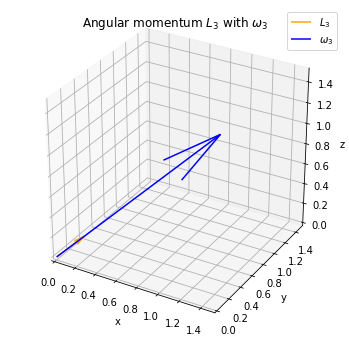

In [13]:
fig = plt.figure(figsize=(6, 6))
ax3 = plt.axes(projection='3d')
ax3.quiver(0, 0, 0, *l3, color='orange', label='$L_3$')
ax3.quiver(0, 0, 0, *w3, color='blue', label='$\omega_3$')
ax3.set_xlim([0, 1.5])
ax3.set_ylim([0, 1.5])
ax3.set_zlim([0, 1.5])
# ax3.azim = -60

ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.set_title('Angular momentum $L_{}$ with $\omega_{}$'.format(3, 3))
ax3.legend()

### PROBLEM 4 (25 pts.; 50/50 for code & discussion)

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)* 

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(5 pts.)*

Using the relaxation method, we can also solve non-linear equations of the form $x=f(x)$ implemented in the function below. We take some starting value and use this as $x$ to evaluate the RHS of the equation and store it as `next`. On the next iteration, we use `next` to evaluate the RHS again and repeat until the desired accuracy. The previous estimate `prev` is also stored to calculate the error estimate.

In [14]:
def relaxation_solve(f, start, max_error, print_logs=False):

  pprev = f(start)
  prev = f(pprev)
  next = f(prev)
  error = abs((prev - next)**2/(2*prev - pprev - next))
  
  while max_error < error:
    pprev = prev
    prev = next
    next = f(prev)
    error = abs((prev - next)**2/(2*prev - pprev - next))

    if print_logs:
      print("Estimate: {} | Error: {}".format(next, error))

  return next

We can test this using the equation $x=1-e^{-2x}$. The method resolves to 0.7968075774224933 accurate to 5 decimal places.

In [15]:
f = lambda x: 1 - np.exp(-2*x)
relaxation_solve(f, 0.5, 10e-6, print_logs=True)

Estimate: 0.7821205821947897 | Error: 0.016921681233790217
Estimate: 0.7907532631816485 | Error: 0.006434867747416544
Estimate: 0.794334975085306 | Error: 0.002539841355091283
Estimate: 0.7958029765851733 | Error: 0.001019547616243053
Estimate: 0.7964016204183796 | Error: 0.00041222899708513505
Estimate: 0.7966452403764663 | Error: 0.00016717378220888708
Estimate: 0.7967442987979305 | Error: 6.787815827245233e-05
Estimate: 0.7967845631871013 | Error: 2.75745849036136e-05
Estimate: 0.7968009272190715 | Error: 1.1204081180516648e-05
Estimate: 0.7968075774224933 | Error: 4.552808949819116e-06


0.7968075774224933

To determine the behavior of the equation $x=1-e^{-cx}$ as $c$ varies, we can iterate over values of $c$. This is done for $c\in[0, 3]$ in increments of 0.01 below.

In [16]:
cs = np.arange(0, 3, 0.01)
fx = []

for c in cs:
  fc = lambda x: 1 - np.exp(-c*x)
  x = relaxation_solve(fc, 0.5, 10e-6)
  fx.append(x)

fx = np.array(fx)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


Plotting the resulting solutions of $x$ as $c$ varies gives the graph shown below. There are two distinct regions. For $c\in[0,1]$, the solution found is the trivial solution $x=0$. In the region $c\in[1,3]$, the solution grows asymptotically to $x=1$.

This solution is incomplete in the domain $c\in[0,1]$. The second solution is the solution from the domain $c\in[1,3]$ continued into the negative x-axis.

Text(0, 0.5, 'x')

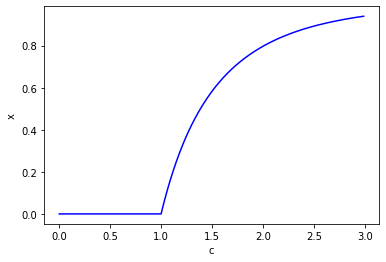

In [17]:
fig, ax = plt.subplots()
sns.lineplot(x=cs, y=fx, color="blue", ax=ax)
ax.set_title("")
ax.set_xlabel("c")
ax.set_ylabel("x")

### PROBLEM 5 (30 pts.; 50/50 for code & discussion)

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two. 

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use either one of (i) Newton's method or (ii) the secant method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures. (30 pts.) 

To calculate the $L_1$ point of the Earth-Moon system, we use Newton's method implemented in the function below. The function calculates a neighboring root of an equation $x_0$ from a starting point $x$ by using the function `f`, its first derivative `df`, and a starting point `start` and solves
$$x_0=x-\frac{f(x)}{f'(x)}$$
The function repeats this, using the previous $x_0$ as the new starting point until the $n$ first digits of the solution do not change specified by `acc`. 

In [18]:
def newton_solve(f, df, start, acc, print_logs=False):
  prev = start
  next = start
  error = np.inf
  while True:
    delta = (f(prev))/df(prev)
    next = next - delta

    if print_logs:
      print("Estimate: {}".format(next))

    if (next // 10**np.floor(np.log10(next) - acc + 1)) == (prev // 10**np.floor(np.log10(prev) - acc + 1)):
      break

    prev = next

  return next

We then define the LHS of the equation
$$ \begin{equation}
f(r)=\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} -\omega^2
\end{equation}$$
and its first derivative
$$ \begin{equation}
f'(r)=-\frac{2GM}{r^3} - \frac{2Gm}{(R-r)^3} - \omega^2
\end{equation} $$

Lastly, we input this into the function `newton_solve` with a starting point $1\times10^4 \text{ km}$. This gives us the $L_1$ distance $4.54316\times10^{4}\text{ km}$. 

In [19]:
G = 6.674*10e-11
M = 5.974*10e24
m = 7.348*10e22
o = 2.662*10-6
R = 3.844*10e8

f = lambda x: G*M/x**2 - G*m/(R-x)**2 - o**2*x
df = lambda x: -2*G*M/x**3 - 2*G*m/(R-x)**3 - o**2

newton_solve(f, df, 10e4, 4, True)

Estimate: 23688.932933529577
Estimate: 33181.451076641155
Estimate: 41657.43721125161
Estimate: 45101.545074042544
Estimate: 45429.19071711301
Estimate: 45431.59996913639
Estimate: 45431.60009691786


45431.60009691786